# The Perceptron Learning Algorithm

## Functions

In [36]:
from __future__ import annotations
import numpy as np
from random import randrange
from matplotlib import pyplot as plt
from typing import List, Tuple
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
class Line:
    def __init__(self):
        self.point = (randrange(-100, 100), randrange(-100, 100))
        self.b = randrange(-10, 10)
        if  self.point[0]:
            self.slope =  (self.point[1] - self.b) / self.point[0]
            self.slope = int(self.slope * 1000) / 1000
        else:
            # line is y axis
            self.slope =  None
        
    
    def __str__(self):
        if self.slope:
            b_str = f'+{self.b}' if self.b > 0 else f'{self.b}' if self.b < 0 else ''
            return f'y = {self.slope}x{b_str}'
        else:
            return 'x=0'

    
    def point_is_orange(self, point: np.ndarray):
        if self.slope:
            f_x = (point[1] * self.slope) + self.b
            y = point[2]
            
            return True if f_x > y else False
        
        else:
            return True if point[1] < 0 else False
        

In [3]:
def sign(x):
    return 1 if x > 0 else -1

def inner_multi(a: np.ndarray, b: np.ndarray):
    return (a * b).sum()

In [4]:
def abline(slope=0, intercept=0, color='black', linestyle='--', vert=False):
    """Plot a line from slope and intercept"""
    if not vert:
        axes = plt.gca()
        x_vals = np.array(axes.get_xlim())
        y_vals = intercept + slope * x_vals
        plt.plot(x_vals, y_vals, linestyle=linestyle, color=color, scalex=False, scaley=False, markersize=20)
    else:
        plt.axvline(x=0, linestyle=linestyle, color=color, markersize=20)

In [5]:
def generate_random_inputs(N_of_inputs=20, dim=2) -> np.ndarray:
    range_values = N_of_inputs * 100
    RANGE = (-range_values, range_values)
    
    # first value of x in inputs is 1, to be multi with the intercept (aka 'b') from 'w' vector
    # therefore add 1 to the dimensions
    dim += 1
    
    inputs = np.random.randint(*RANGE, size=(N_of_inputs, dim))
    
    # fix 0's value of vectors to 1
    for x in inputs:
        x[0] = 1
    
    return inputs

In [6]:
def show_current_value(goal_line: Line, w: np.ndarray, orange_points: np.ndarray, blue_points: np.ndarray):
    plt.scatter(orange_points[:,1], orange_points[:,2])
    plt.scatter(blue_points[:,1], blue_points[:,2])
    abline(goal_line.slope, goal_line.b, color='green')

    w_slope = -(w[1] - w[0])/w[2]
    w_b = w[0]
    abline(w_slope , w_b, color='red', linestyle=':')
    
    plt.title('goal is green, Perceptron is red')
    plt.show()

In [7]:
def divide_orange_and_blue(inputs: np.ndarray, line: Line) -> Tuple[np.ndarray, np.ndarray]:
    orange_points = np.array(list(filter(line.point_is_orange, inputs)))
    blue_points = np.array(list(filter(lambda p: not line.point_is_orange(p), inputs)))
    
    return (orange_points, blue_points)

In [8]:
def find_Perceptron_w(goal_line: Line, inputs: np.ndarray, show_changes=False, dim=2) -> Tuple[np.ndarray, int]:
    orange_points, blue_points = divide_orange_and_blue(inputs, goal_line)
    
    w = np.array([1 for _ in range(dim+1)])
    changes = 0

    for iter_num, x in enumerate(inputs, start=1):
        wx = inner_multi(w, x)
        y = 1 if goal_line.point_is_orange(x) else -1
        
        if (sign(wx) != y):
            changes += 1
            w += y * x
            
            if show_changes:
                print(f'w at iter_num {iter_num}:', w)
                show_current_value(goal_line, w, orange_points, blue_points)
    
    print(f'\n\n\nfinal w after {iter_num} iterations and {changes} changes:', w)
    show_current_value(goal_line, w, orange_points, blue_points)
    return (w, changes)

## Generate data set of size N=20

In [9]:
DIM = 2
N = 20

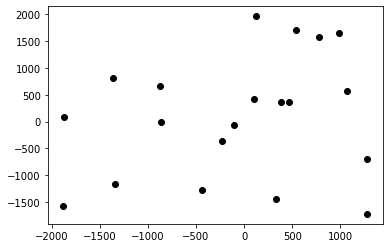

In [10]:
inputs = generate_random_inputs(N_of_inputs=N, dim=DIM)
plt.scatter(inputs[:,1], inputs[:,2], color='black')
plt.show()

## Create Line object

In [11]:
line = Line()
print(line)

y = -0.89x+4


## Divide the inputs into two groups

In [12]:
orange_points, blue_points = divide_orange_and_blue(inputs, line)

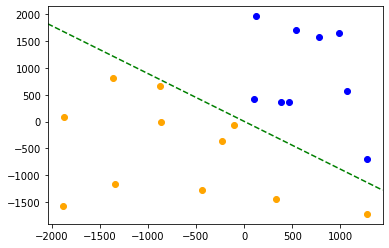

In [13]:
plt.scatter(orange_points[:,1], orange_points[:,2], color='orange')
plt.scatter(blue_points[:,1], blue_points[:,2], color='blue')
abline(line.slope, line.b, color='green')
plt.show()

w at iter_num 1: [    2 -1881 -1572]


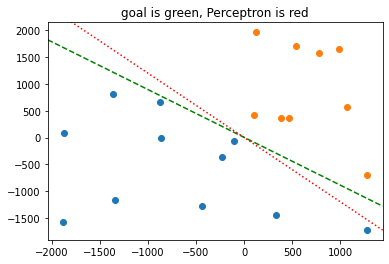




final w after 20 iterations and 1 changes: [    2 -1881 -1572]


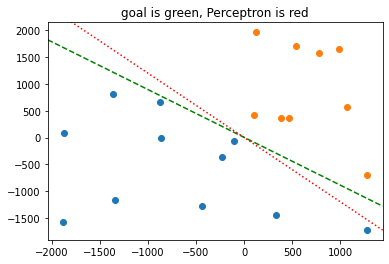

In [14]:
w, updates_count = find_Perceptron_w(line, inputs, show_changes=True, dim=DIM)

### f (in green) is pretty close to g (in red) but it's not always 100%

## define general function for all of this process

In [15]:
def projection(v_proj_from: np.ndarray, v_proj_on: np.ndarray) -> np.ndarray:
    if norma_sqr := inner_multi(v_proj_from, v_proj_from):
        scalar = inner_multi(v_proj_from, v_proj_on) / norma_sqr
        return scalar * v_proj_on
    else:
        return v_proj_on

In [37]:
def main_Perceptron(N_of_inputs=20, show_changes=False, dim=2) -> Tuple[np.ndarray, int]:
    # create random data set of points
    inputs = generate_random_inputs(N_of_inputs=N_of_inputs)
    plt.scatter(inputs[:,1], inputs[:,2], color='black')
    plt.title('Inputs')
    plt.show()
    
    # create random seprator line
    line = Line()
    print(line)
    
    # Divide the inputs into two groups
    blue_points, orange_points = divide_orange_and_blue(inputs, line)
    
    plt.title('separated inputs')
    plt.scatter(orange_points[:,1], orange_points[:,2], color='orange')
    plt.scatter(blue_points[:,1], blue_points[:,2], color='blue')
    abline(line.slope, line.b, color='green')
    plt.show()
    
    w, updates_count = find_Perceptron_w(line, inputs, show_changes=show_changes, dim=dim)

    return w, updates_count

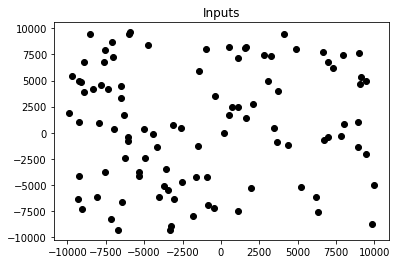

y = 5.0x-6


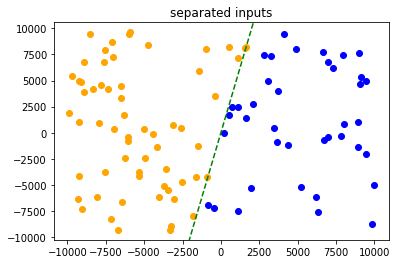




final w after 100 iterations and 12 changes: [    1 15756 -5780]


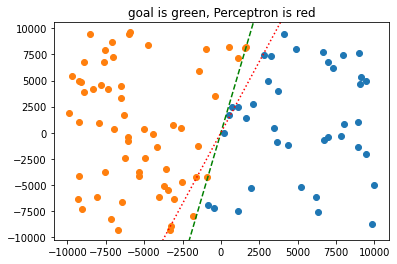

In [17]:
w, updates_count = main_Perceptron(100, False)

## calculate the fraction of points where f and g disagree on this data set

# The Perceptron Learning Algorithm
## Auther: Yam Arieli

In [18]:
from __future__ import annotations
import numpy as np
from random import randrange
from matplotlib import pyplot as plt
from typing import List, Tuple
from scipy.stats import norm

In [19]:
def sign(x):
    return 1 if x > 0 else -1

def inner_multi(a: np.ndarray, b: np.ndarray):
    return (a * b).sum()

In [20]:
def abline(slope=0, intercept=0, color='black', linestyle='--', vert=False):
    """Plot a line from slope and intercept"""
    if not vert:
        axes = plt.gca()
        x_vals = np.array(axes.get_xlim())
        y_vals = intercept + slope * x_vals
        plt.plot(x_vals, y_vals, linestyle=linestyle, color=color, scalex=False, scaley=False, markersize=20)
    else:
        plt.axvline(x=0, linestyle=linestyle, color=color, markersize=20)

In [21]:
def generate_random_inputs(N_of_inputs=20, dim=2) -> np.ndarray:
    range_values = N_of_inputs * 100
    RANGE = (-range_values, range_values)
    
    # first value of x in inputs is 1, to be multi with the intercept (aka 'b') from 'w' vector
    # therefore add 1 to the dimensions
    dim += 1
    
    inputs = np.random.randint(*RANGE, size=(N_of_inputs, dim))
    
    # fix 0's value of vectors to 1
    for x in inputs:
        x[0] = 1
    
    return inputs

In [22]:
class Plane:

    def __init__(self, dim=2, w=np.ndarray(0)):
        if w.tolist():
            temp = w.copy()
            norma = inner_multi(temp, temp)
            self.vector = temp / norma # normal
        else:
            # Note that if 'w' is given as param, the values of 'bound' and 'dim'
            # will be ignored
            BOUND = 100
            self.vector = np.array([randrange(1, BOUND) for _ in range(dim+1)])
        
        if self.vector.sum() < 0:
            self.vector = -self.vector
    
    def point_is_orange(self, point: np.ndarray) -> bool:
        return True if inner_multi(point, self.vector) > 0 else False
    
    def separate_inputs(self, inputs: np.ndarray) -> dict:
        oranges = np.array(list(filter(self.point_is_orange, inputs)))
        blues = np.array(list(filter(lambda i: not self.point_is_orange(i), inputs)))
        
        return {'orange': oranges, 'blue': blues}
    
    def find_Perceptron_w(self, inputs: np.ndarray, dim=2, print_updates_count=True) -> Tuple[np.ndarray, int]:
        w = np.array([1 for _ in range(dim+1)])
        updates = 0

        for iter_num, x in enumerate(inputs, start=1):
            wx = inner_multi(w, x)
            y = 1 if self.point_is_orange(x) else -1

            if (sign(wx) != y):
                updates += 1
                w += y * x
        
        if print_updates_count:
            print(f'\nThere were {updates} updates before converging into:\nw =', w)

        return (w, updates)
    
    def find_Perceptron_w_as_plane(self, inputs: np.ndarray, dim=2) -> Plane:
        return self.find_Perceptron_w(inputs, dim)
    
    def compare_planes_classification(self, other: Plane, inputs: np.ndarray) -> list:
        mistakes = [i for i in inputs if self.point_is_orange(i) != other.point_is_orange(i)]
        
        mis_count = len(mistakes)
        percent = 100*mis_count/len(inputs)
        print(f'there are {mis_count} mistakes.\nThis is {percent}% of the data')
        if percent < 15:
            print('f is close to g.')
        elif percent < 30:
            print('f is mildly close to g.')
        else:
            print('f is not close to g.')
        
        return mistakes
    
    def line_by_vector(self, color='black', linestyle='--'):
        if self.vector[1] != 0:
            slope = -self.vector[1] / self.vector[2]
            abline(slope, self.vector[0], color=color, linestyle=linestyle)
        else:
            abline(vert=True)
    
    def scatter_mistakes(self, mistakes: List[np.ndarry]):
        for co in mistakes:
            plt.scatter(co[1], co[2], color='red')

## Generate random inputs and Divide them into two groups

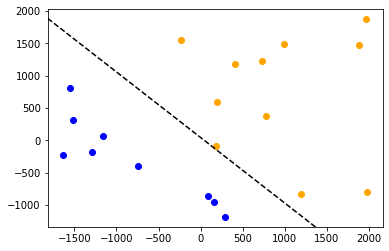

In [23]:
d = 2
N = 20
plane = Plane(dim=d)
inputs = generate_random_inputs(N_of_inputs=N, dim=d)

separated = plane.separate_inputs(inputs)
orange_points = separated['orange']
blue_points = separated['blue']

plt.scatter(orange_points[:,1], orange_points[:,2], color='orange')
plt.scatter(blue_points[:,1], blue_points[:,2], color='blue')

plane.line_by_vector()

plt.show()

In [24]:
w, c = plane.find_Perceptron_w(inputs, d)


There were 0 updates before converging into:
w = [1 1 1]


In [25]:
plane_w = Plane(w=w)

there are 0 mistakes.
This is 0.0% of the data
f is close to g.


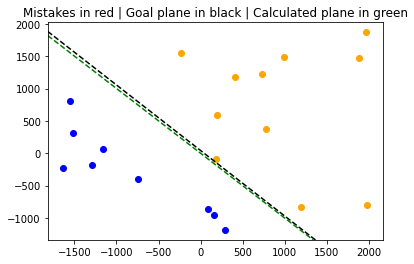

In [26]:
plt.scatter(orange_points[:,1], orange_points[:,2], color='orange')
plt.scatter(blue_points[:,1], blue_points[:,2], color='blue')
mistakes = plane.compare_planes_classification(plane_w, inputs)
plane.scatter_mistakes(mistakes)

plane.line_by_vector()
plane_w.line_by_vector(color='green')

plt.title('Mistakes in red | Goal plane in black | Calculated plane in green')

plt.show()

##  Randomly generate a test data of size 100 and calculate the fraction of points where f and g disagree on this data set.

there are 0 mistakes.
This is 0.0% of the data
f is close to g.


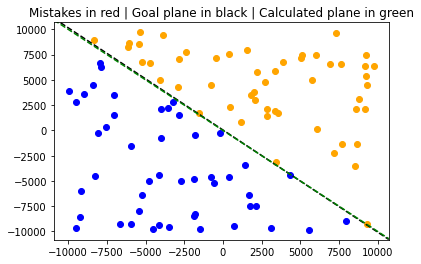

In [27]:
new_inputs = generate_random_inputs(N_of_inputs=100, dim=d)

mistakes = plane.compare_planes_classification(plane_w, new_inputs)

separated = plane.separate_inputs(new_inputs)
orange_points = separated['orange']
blue_points = separated['blue']

plt.scatter(orange_points[:,1], orange_points[:,2], color='orange')
plt.scatter(blue_points[:,1], blue_points[:,2], color='blue')
plane.scatter_mistakes(mistakes)
plane.line_by_vector()
plane_w.line_by_vector(color='green')

plt.title('Mistakes in red | Goal plane in black | Calculated plane in green')

plt.show()

In [28]:
def main_PLA(d=2, N=20):
    # Genrate random plane
    plane = Plane(dim=d)
    # Genrate random inputs
    inputs = generate_random_inputs(N_of_inputs=N, dim=d)
    
    # Divide them into two groups by the plane
    separated = plane.separate_inputs(inputs)
    orange_points = separated['orange']
    blue_points = separated['blue']
    plt.scatter(orange_points[:,1], orange_points[:,2], color='orange')
    plt.scatter(blue_points[:,1], blue_points[:,2], color='blue')
    plane.line_by_vector()
    plt.show()

    # Run Perceptron algorithm
    w, c = plane.find_Perceptron_w(inputs, d)
    # Create plane by the calculated 'w' vector
    plane_w = Plane(w=w)
    
    # Find the mistakes
    mistakes = plane.compare_planes_classification(plane_w, inputs)
    
    # Plot what we found
    plt.scatter(orange_points[:,1], orange_points[:,2], color='orange')
    plt.scatter(blue_points[:,1], blue_points[:,2], color='blue')
    plane.scatter_mistakes(mistakes)
    plane.line_by_vector()
    plane_w.line_by_vector(color='green')
    plt.title('Mistakes in red | Goal plane in black | Calculated plane in green')
    plt.show()
    
    # Randomly generate a test data of size 100 and calculate the fraction of points 
    # where f and g disagree on this data set
    new_inputs = generate_random_inputs(N_of_inputs=100, dim=d)
    mistakes = plane.compare_planes_classification(plane_w, new_inputs)
    
    # Separate the test data by the original plane
    separated = plane.separate_inputs(new_inputs)
    orange_points = separated['orange']
    blue_points = separated['blue']
    
    # Show the comparison on the new data
    plt.scatter(orange_points[:,1], orange_points[:,2], color='orange')
    plt.scatter(blue_points[:,1], blue_points[:,2], color='blue')
    plane.scatter_mistakes(mistakes)
    plane.line_by_vector()
    plane_w.line_by_vector(color='green')
    plt.title('Mistakes in red | Goal plane in black | Calculated plane in green')
    print('Test on new 100 inputs')
    plt.show()

# 2B

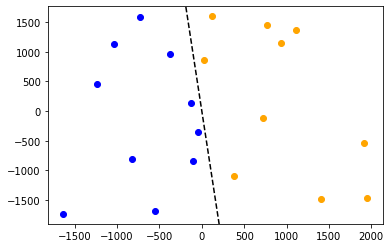


There were 5 updates before converging into:
w = [   0 1957   91]
there are 0 mistakes.
This is 0.0% of the data
f is close to g.


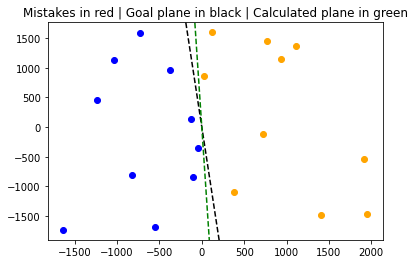

there are 3 mistakes.
This is 3.0% of the data
f is close to g.
Test on new 100 inputs


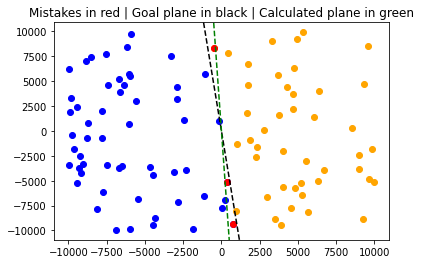

In [29]:
main_PLA(N=20, d=2)

# 2C

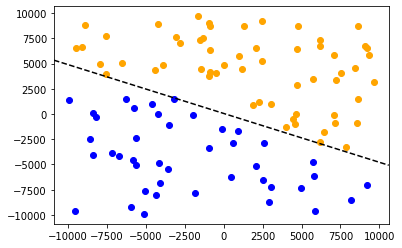


There were 6 updates before converging into:
w = [    1  9783 14145]
there are 3 mistakes.
This is 3.0% of the data
f is close to g.


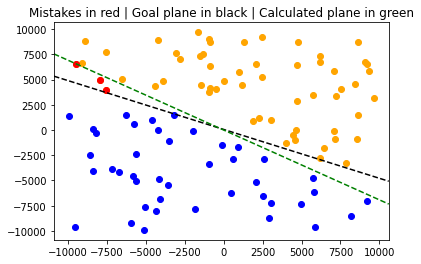

there are 7 mistakes.
This is 7.0% of the data
f is close to g.
Test on new 100 inputs


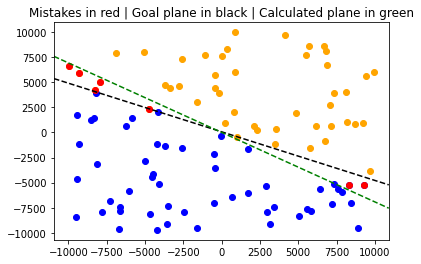

In [30]:
main_PLA(N=100, d=2)

# 2D

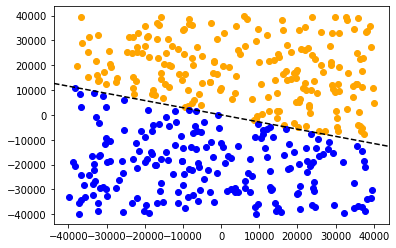


There were 151 updates before converging into:
w = [      6  793246 3053310]
there are 3 mistakes.
This is 0.75% of the data
f is close to g.


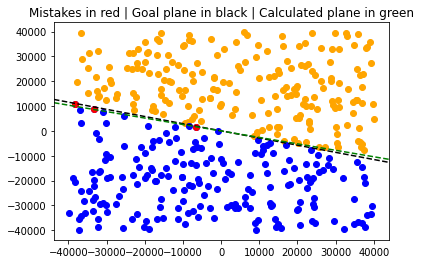

there are 2 mistakes.
This is 2.0% of the data
f is close to g.
Test on new 100 inputs


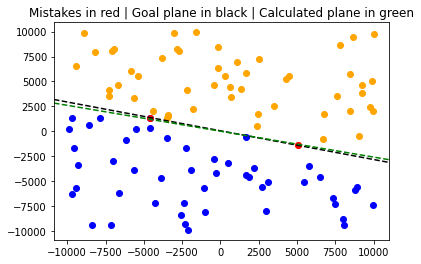

In [31]:
main_PLA(N=400, d=2)

# 2E

In [32]:
def main_multi_dim_PLA(d=10, N=1000) -> list:
    experiments_count = 100
    updates_list = []
    # Genrate random plane
    plane = Plane(dim=d)
    # Genrate random inputs
    inputs = generate_random_inputs(N_of_inputs=N, dim=d)
    
    for _ in range(experiments_count):
        # pick x(t) randomly instead of deterministically
        np.random.shuffle(inputs)
        
        # Run Perceptron algorithm
        w, updates = plane.find_Perceptron_w(inputs, d, print_updates_count=False)
        updates_list.append(updates)
        
    return updates_list

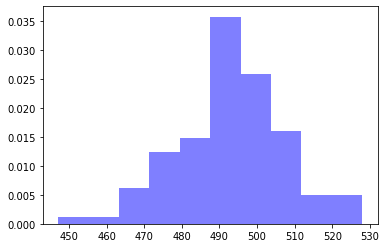

In [33]:
updates_list = main_multi_dim_PLA(d=10, N=1000)

# Plot the histogram.
plt.hist(updates_list, bins=10, density=True, alpha=0.5, color='b');

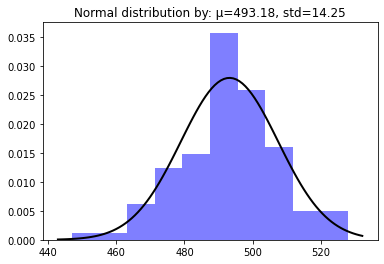

In [34]:
# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(updates_list) 
  
# Plot the histogram.
plt.hist(updates_list, bins=10, density=True, alpha=0.5, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Normal distribution by: µ={:.2f}, std={:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

# Conclusions

1) As the learning data increases, the function g calculated by the PLA approaches f.
    * This can be seen by the decrease in the percentage of error when examining the classification of g on data of the same size (N=100).
    * In my experiments:
        * learning data=20 -> 9% errors
        * learning data=100 -> 4% errors
        * learning data=1000 -> 2% errors
2) The number of updates in PLA is close to the normal distribution
    * with
        * dim=10
        * N=1000
    * we can describe the number of updates in PLA with the normal distribution:
        * µ≅496
        * σ≅ 16